<a href="https://colab.research.google.com/github/ShrudhiChaudhary/Netflix-movies-tv-shows-clustering/blob/main/Netflix_Movies_and_TV_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Shrudhi Chaudhary

# **Project Summary -**

## In the project we are given a dataset of different movies and Tv shows with their cast , directors and duration along the with description of the movies. Various clustering algorithms are used in order to form different clusters and to sort out the different opnions based on the description provided. 

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


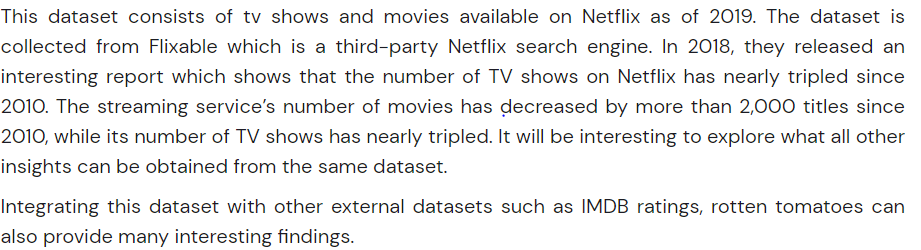

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, sent_tokenize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
df1 = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df1.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df1.shape

### Dataset Information

In [ ]:
# Dataset Info
df1.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df1.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df1.isnull().sum()

In [ ]:
# Visualizing the missing values
sns.heatmap(df1.isnull(), cbar=False)

### What did you know about your dataset?

Dataset consists of 7787 rows and 12 columns 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df1.columns

In [ ]:
# Dataset Describe
df1.describe()

### Variables Description 

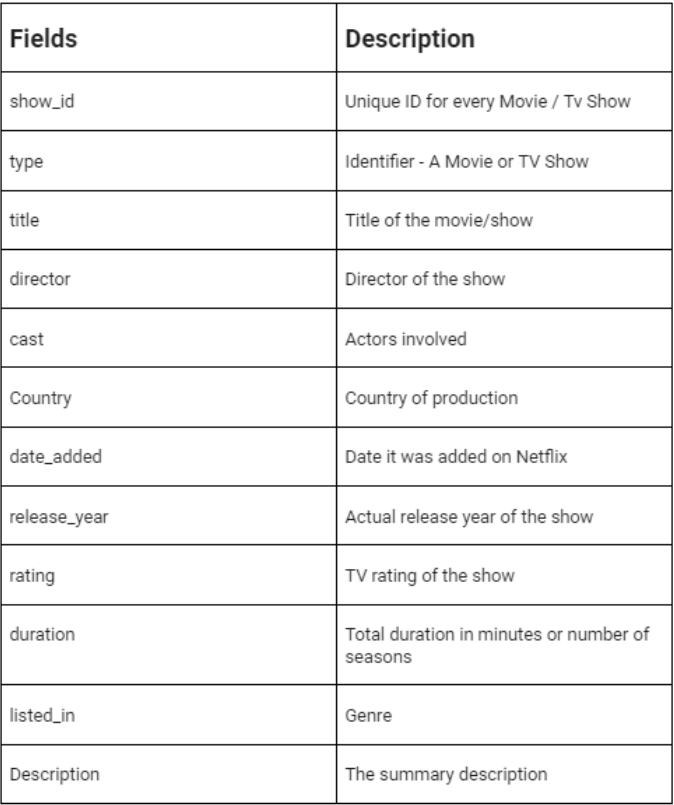

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df1.columns.tolist():
  print("No. of unique values in ",i,"is",df1[i].nunique(),".")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df1['add_year'] = pd.DatetimeIndex(df1['date_added']).year
df1.head()

In [ ]:
# Write your code to make your dataset analysis ready.
df1[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df1['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df1.dropna(axis=0, inplace = True)

In [ ]:
# Splitting the duration column, and changing the datatype to integer
df1['duration'] = df1['duration'].apply(lambda x: int(x.split()[0]))

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(15,5))
plt.title('Releases')
plt.xticks(rotation=90)
sns.countplot(data = df1, x = 'release_year' )

##### 1. Why did you pick the specific chart?

To study about the years when the movies were releases

##### 2. What is/are the insight(s) found from the chart?

2017 has the most number of releases

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative growth

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(35,8))
plt.title('Max duration')
plt.xticks(rotation=90)
sns.countplot(data = df1, x = 'duration' )

##### 1. Why did you pick the specific chart?

To study about the different durations for movies

##### 2. What is/are the insight(s) found from the chart?

Most of the movies have a average duration of 80-90 mins 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative growth

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(15,5))
plt.title('Ratings')
plt.xticks(rotation=90)
sns.countplot(data = df1, x = 'rating' )

##### 1. Why did you pick the specific chart?

To study about different ratings

##### 2. What is/are the insight(s) found from the chart?

Tv-MA has the highest count of ratings followed by TV-14 and almost 0 to NC-17,TV-Y7-FV and UR

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative growth

#### Chart - 4

In [ ]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df1[~(df1['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

##### 1. Why did you pick the specific chart?

To study about the top 10 countries with the highest number of shows

##### 2. What is/are the insight(s) found from the chart?

United States has the highest number of production of movies and Indonesia at it's least

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative growth

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
df4 = df1[(df1['release_year'] == 2017)]
df5 = df4[(df4['rating']=='TV-MA')]

In [ ]:
plt.figure(figsize=(50,7))
plt.title('Movies releasing in 2017',fontsize = 25)
plt.xticks(rotation=90,fontsize = 20)
sns.countplot(data = df6.head(100), x = 'title')

##### 1. Why did you pick the specific chart?

To study about the movie releasing in 2017

##### 2. What is/are the insight(s) found from the chart?

It tells us about the different movies releasing in 2017

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative growth

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(15,5))
plt.title('Added on Netflix')
plt.xticks(rotation=90)
sns.countplot(data = df1, x = 'add_year' )

##### 1. Why did you pick the specific chart?

To study about the movies added on Netflix in various years

##### 2. What is/are the insight(s) found from the chart?

2019 has the most number of movies that have the most movies added on Netflix

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative growth

#### Chart - 7

In [ ]:
# Average movie length over the years
plt.figure(figsize=(15,8))
df1[df1['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

##### 1. Why did you pick the specific chart?

To study about the average movie length

##### 2. What is/are the insight(s) found from the chart?

The movie duration has decreased to a greater extent from 2000 to 2020.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

NO negative growth

#### Chart - 8

In [ ]:
#Seasons in each TV show
plt.figure(figsize=(15,8))
p = sns.countplot(x='duration',data=df1[df1['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

To study about the number of seasons per TV show

##### 2. What is/are the insight(s) found from the chart?

Many shows have only 1 season and followed by other. Only 1 show has 15 seasons

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

NO negative growth

#### Chart - 9

In [ ]:
plt.figure(figsize=(15,8))
p = sns.countplot(x='add_year',data=df1, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

To study about the number of movies and TV shows added over the years

##### 2. What is/are the insight(s) found from the chart?

2019 has the highest number of movies added over all the years. 2020 has the highest number of TV shows 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative growth

#### Chart - 10

In [ ]:
plt.figure(figsize=(10,5))
df1.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

##### 1. Why did you pick the specific chart?

To study about top genres

##### 2. What is/are the insight(s) found from the chart?

Dramas and international movies have the highest demands and then the stand-up comedies 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative growth

#### Chart - 11

In [ ]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df1['rating'].replace(rating_map, inplace = True)
df1['rating'].unique()

In [ ]:
plt.figure(figsize=(10,5))
df1.rating.value_counts().plot(kind='barh')
plt.title('Number of shows on Netflix for different age groups')

##### 1. Why did you pick the specific chart?

To study about the different rating 

##### 2. What is/are the insight(s) found from the chart?

Most of the movies are for adults and then young adults and then the remaining

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative growth

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(7,7))
df1.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

In [ ]:
plt.figure(figsize=(10,5))
df1[~(df1['cast']=='Unknown') & (df1['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

##### 1. Why did you pick the specific chart?

Study about actors who have appeared in highesr number of movies

##### 2. What is/are the insight(s) found from the chart?

Ge to know about the actors who have worked in highest number of movies and the pie chart of tv shows and movies

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative growth

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(10,5))
df1[~(df1['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

In [ ]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df1[~(df1['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')

##### 1. Why did you pick the specific chart?

To study the top 10 tv shows and directors

##### 2. What is/are the insight(s) found from the chart?

The top 10 TV shows can be hence found out using this graph and also the top 10 directors of those shows

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No negative growth

#### Chart - 14 - Correlation Heatmap

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df1.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

Just replaced the null values by word 'Unknown'

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
df1.plot(kind="box",subplots=True,layout=(12,2),figsize=(25,30))

In [ ]:
for x in ['release_year']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [ ]:
for x in ['add_year']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [ ]:
df1.plot(kind="box",subplots=True,layout=(12,2),figsize=(25,30))

##### What all outlier treatment techniques have you used and why did you use those techniques?

By using the Quantile method I have removed the outliers. Using this method makes it easier to visualize the outliers and remove them accordingly

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
df2 = df1.copy()

In [ ]:
df2.fillna('',inplace=True)

In [ ]:
# Combining all the clustering attributes into a single column

df2['clustering_attributes'] = (df2['director'] + ' ' + 
                                df2['cast'] +' ' + 
                                df2['country'] +' ' + 
                                df2['listed_in'] +' ' + 
                                df2['description'])

In [ ]:
df2['clustering_attributes'][40]

#### 1. Expand Contraction

In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df2['clustering_attributes'])

In [ ]:
df2['clustering_attributes'][40]

#### 2. Lower Casing

In [ ]:
# Lower Casing
df1['description'] = df1['description'].apply(str.lower)
df1

#### 3. Removing Punctuations

In [ ]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
df2['clustering_attributes'] = df2['clustering_attributes'].apply(remove_punctuation)

In [ ]:
df2['clustering_attributes'][40]

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
# Not Required

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

In [ ]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
df2['clustering_attributes'] = df2['clustering_attributes'].apply(stopwords)

In [ ]:
df2['clustering_attributes'][40]

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
# Not required

#### 7. Tokenization

In [ ]:
# Tokenization
tokenizer = TweetTokenizer()

In [ ]:
df2['clustering_attributes'] = df2['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
nltk.download('wordnet')

In [ ]:
# Lemmatization
df2['clustering_attributes'] = lemmatize_verbs(df2['clustering_attributes'])

In [ ]:
df2['clustering_attributes'][40]

##### Which text normalization technique have you used and why?

Lemmatisation (or lemmatization) in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
clustering_data = df2['clustering_attributes']

In [ ]:
# Vectorizing Text
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
X = tfidf.fit_transform(clustering_data)

In [ ]:
X

In [ ]:
X.shape

In [ ]:
X = X.toarray()

##### Which text vectorization technique have you used and why?

TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc)  in a document amongst a collection of documents (also known as a corpus).

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Noo

### 6. Data Scaling

In [ ]:
# Scaling your data


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes it is required. 

In [ ]:
# DImensionality Reduction (If needed)
pca = PCA(random_state=42)
pca.fit(X)

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

In [ ]:
x_pca = pca.transform(X)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Principle Component Analysis is used for dimensionality reduction to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No the datset isn't imbalanced

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=13, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(x_pca)

In [ ]:
# Adding a kmeans cluster number attribute
df2['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(15,8))
q = sns.countplot(x='hierarchical_cluster',data=df2, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
# Clustering the data
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=33)
kmeans.fit(x_pca)

In [ ]:
# Adding a kmeans cluster number attribute
df2['kmeans_cluster'] = kmeans.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(15,8))
q = sns.countplot(x='kmeans_cluster',data=df2, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

K-means clustering and Hierarchial clustering is used in order to do the final prediction

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

## K-means clustering and Hierarchical clustering is used in order to perform unsupervised learning. Both the algorithms results to give out different number of clusters and both try to be the best on it's own and different metrics have been used to find the optimum number of clusters. 

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***